## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 

## Importing libraries

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

## Reading data and Understanding Data

In [88]:
# Reading the csv file having data
houses_df=pd.read_csv("train.csv")

In [89]:
# checking on first 5 rows
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
#checking list of all columns
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
# checking total number of columns and rows
houses_df.shape

(1460, 81)

In [92]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [93]:
#checking on numeric columns and range of values
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### In above we can see we have we have 38 numeric columns . So remaining 43 (81-38) are categorical. Out of 38 numeric columns there may be possibility of categorical columns also.

## Let's find columns and rows having all null values

In [94]:
#dropping rows having all null values
houses_df=houses_df.dropna(axis=0,how='all')

In [95]:
#dropping columns having all null values
houses_df=houses_df.dropna(axis=1,how='all')

In [96]:
#checking rows and columns after drop
houses_df.shape

(1460, 81)

### There is no change in rows and column of houses_df. this means there is not row or column with all null values.

### Checking if in a columns all values are unique or contains a single not null value in all rows

In [97]:
# calculating unique values pf each column and checking on that
k=houses_df.nunique()
j=k[(k.values ==1) | (k.values==1460)]
j.index

Index(['Id'], dtype='object')

In [98]:
# dropping id column
houses_df.drop('Id',axis=1,inplace=True)

In [99]:
#checking new shape
houses_df.shape

(1460, 80)

### Now replacing NA value to actual value of data, so that they dont be dropped further py python. Because python will treat it as NaN value

In [100]:
# replacing NA with business value we have in data dictionary for categorical columns
houses_df['Alley']=houses_df['Alley'].fillna('NoAlley')
houses_df['BsmtQual']=houses_df['BsmtQual'].fillna('NoBasement')
houses_df['BsmtCond']=houses_df['BsmtCond'].fillna('NoBasement')
houses_df['BsmtExposure']=houses_df['BsmtExposure'].fillna('NoBasement')
houses_df['BsmtFinType1']=houses_df['BsmtFinType1'].fillna('NoBasement')
houses_df['BsmtFinType2']=houses_df['BsmtFinType2'].fillna('NoBasement')
houses_df['FireplaceQu']=houses_df['FireplaceQu'].fillna('NoBasement')
houses_df['GarageType']=houses_df['GarageType'].fillna('NoGarage')
houses_df['GarageFinish']=houses_df['GarageFinish'].fillna('NoGarage')
houses_df['PoolQC']=houses_df['PoolQC'].fillna('NoPool')
houses_df['Fence']=houses_df['Fence'].fillna('NoFence')
houses_df['MiscFeature']=houses_df['MiscFeature'].fillna('NoFence')

### NA value treatment for numeric columns

In [101]:
### Checking null values frequency in each numeric column column
for i in houses_df.columns:
    if houses_df[i].isna().sum()>0:
        print(i,houses_df[i].isna().sum(),type(houses_df[i]))

LotFrontage 259 <class 'pandas.core.series.Series'>
MasVnrType 8 <class 'pandas.core.series.Series'>
MasVnrArea 8 <class 'pandas.core.series.Series'>
Electrical 1 <class 'pandas.core.series.Series'>
GarageYrBlt 81 <class 'pandas.core.series.Series'>
GarageQual 81 <class 'pandas.core.series.Series'>
GarageCond 81 <class 'pandas.core.series.Series'>


In [102]:
# replacing NA with mean for numerical columns and mode for categorical columns
houses_df['LotFrontage']=houses_df['LotFrontage'].fillna(int(houses_df['LotFrontage'].mean()))
houses_df['MasVnrType']=houses_df['MasVnrType'].fillna(houses_df['MasVnrType'].mode())
houses_df['MasVnrArea']=houses_df['MasVnrArea'].fillna(int(houses_df['MasVnrArea'].mean()))
houses_df['Electrical']=houses_df['Electrical'].fillna(houses_df['Electrical'].mode())
houses_df['GarageYrBlt']=houses_df['GarageYrBlt'].fillna(int(houses_df['GarageYrBlt'].mean()))
houses_df['GarageQual']=houses_df['GarageQual'].fillna(houses_df['GarageQual'].mode())
houses_df['GarageCond']=houses_df['GarageCond'].fillna(houses_df['GarageQual'].mode())

### Lets Check for data skewness in columns. If in a column more than 80% of data is same, then We are going to drop that column.

In [103]:
for i in houses_df.columns:
    if (max(houses_df[i].value_counts())/houses_df.shape[0])*100 > 80:
        houses_df.drop(i,inplace=True,axis=1)
        print(i)        

Street
Alley
LandContour
Utilities
LandSlope
Condition1
Condition2
BldgType
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
BsmtFinSF2
Heating
CentralAir
Electrical
LowQualFinSF
BsmtHalfBath
KitchenAbvGr
Functional
GarageQual
GarageCond
PavedDrive
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
SaleType
SaleCondition


## Above list of columns has been dropped because of skewness in data.

In [104]:
#now checking the shape
houses_df.shape

(1460, 47)

In [105]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  RoofStyle     1460 non-null   object 
 13  Exterior1st   1460 non-null   object 
 14  Exterior2nd   1460 non-null   object 
 15  MasVnrType    1452 non-null   object 
 16  MasVnrArea    1460 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

In [106]:
houses_df.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Previously we had 38 numeric columns but now we have 28 numeric columns.

### Converting numerical categorical columns into string.

In [107]:
houses_df['GarageCars']=houses_df['GarageCars'].apply(lambda x : str(x))
houses_df['BsmtFullBath']=houses_df['BsmtFullBath'].apply(lambda x : str(x))
houses_df['FullBath']=houses_df['FullBath'].apply(lambda x : str(x))
houses_df['HalfBath']=houses_df['HalfBath'].apply(lambda x : str(x))
houses_df['GarageCars']=houses_df['GarageCars'].apply(lambda x : str(x))
houses_df['MSSubClass']=houses_df['MSSubClass'].apply(lambda x : str(x))

### Derived Columns

In [108]:
#calculating age of prperty and garage
houses_df['ageofprop']=houses_df['YrSold']-houses_df['YearBuilt']
houses_df['ageofpropaftermod']=houses_df['YrSold']-houses_df['YearRemodAdd']
houses_df['ageofgarage']=houses_df['YrSold']-houses_df['GarageYrBlt']

In [109]:
#dropping the original colummns
houses_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

# EDA

## Univariate Analysis on numeric columns

C:\Users\Rebel\AppData\Local\Temp\ipykernel_18660\2068453993.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


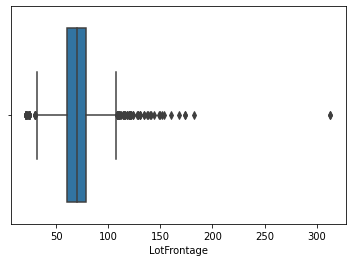

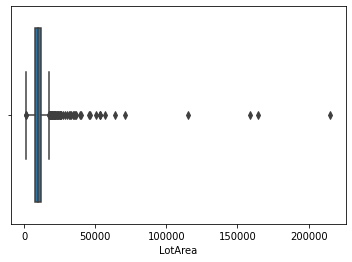

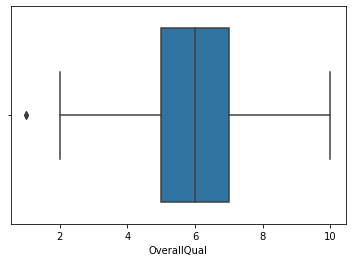

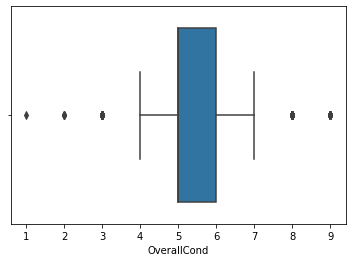

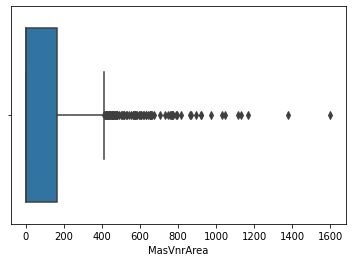

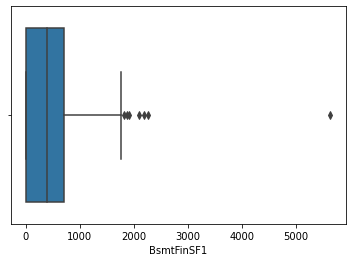

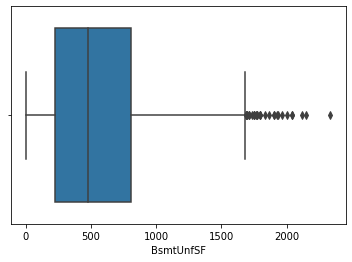

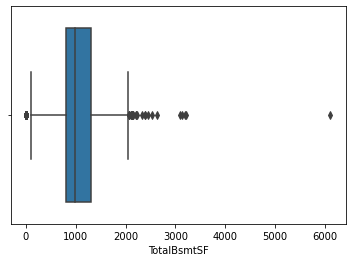

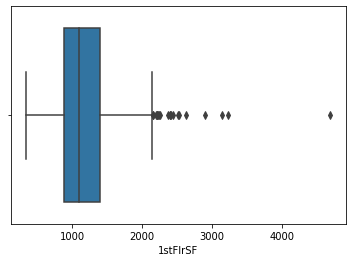

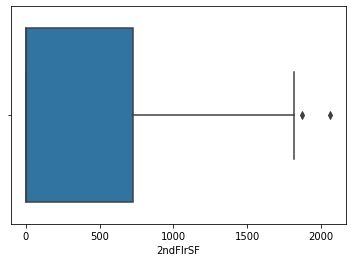

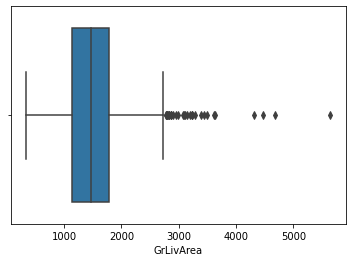

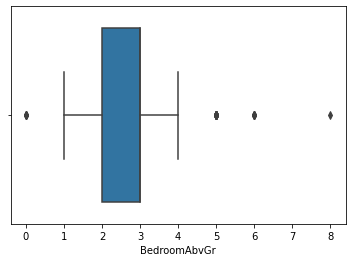

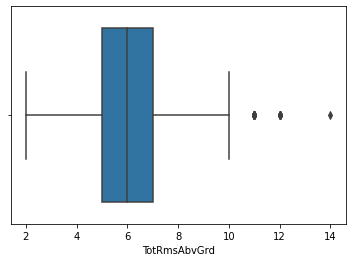

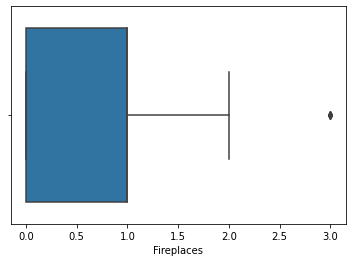

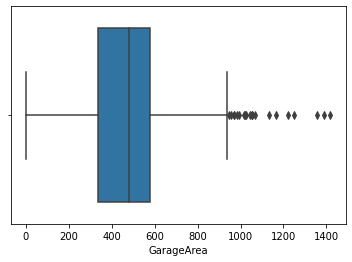

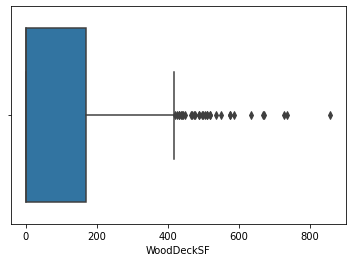

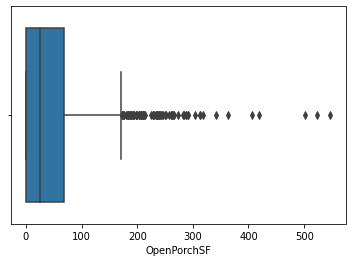

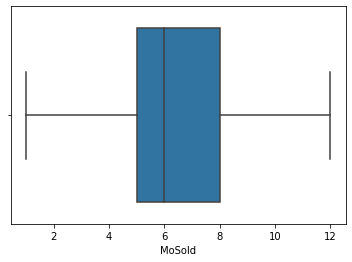

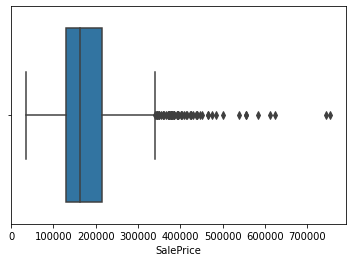

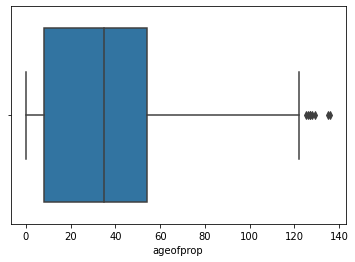

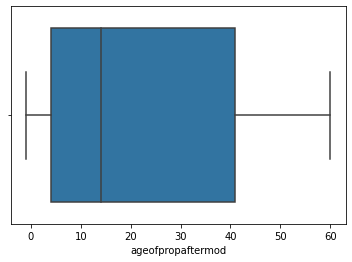

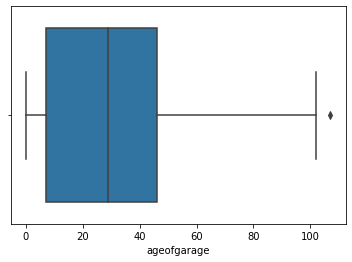

In [110]:
#starting with numerical columns first
for i,col in enumerate(houses_df.describe().columns):
    plt.figure(i)
    sns.boxplot(data=houses_df,x=col)

### 1) LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF,TotalBsmtSF, 1stFlrSF, GrLivArea,GarageArea, WoodDeckSF, OpenPorchSF, SalePrice has lot of outliers. 
### 2) MasVnrArea & BsmtFinSF1 is very low for most of the properties.
### 3) BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, BedroomAbvGr, TotRmsAbvGrd,Fireplaces and MoSold are nicely distributed with very few outliers.
### 4) The mean age of garage is around 20-25 years
### 5) On an average , properties are old around 30-40 years. and after remodification is done, then average age of property is around 15 years.
### 6) Overall quality mean is 6 and overall condition mean is 5.5

### From above all graphs below is the list of columns where we are observing a lot of outliers. Lets pick them one by one. Rest of the columns have less outliers that we ignore.

In [111]:
k=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


### lets see after dropping data below 5 and above 95 percentile values for LotFrontage column . How many rows are we left with?

In [112]:
#getting percentiles
l=np.percentile(houses_df['LotFrontage'],[5,95])
l

array([ 35.95, 104.  ])

In [113]:
#dropping rows beyond the percentiles
new_df=houses_df[(houses_df['LotFrontage']>l[0]) & (houses_df['LotFrontage']<l[1])]
new_df.shape

(1312, 46)

<AxesSubplot:xlabel='LotFrontage'>

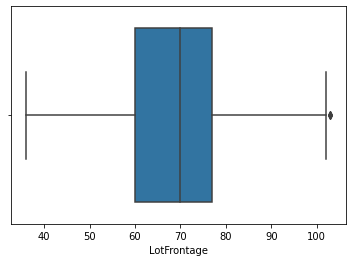

In [114]:
#visualizing it on box plot after dropping outliers
sns.boxplot(data=new_df,x='LotFrontage')

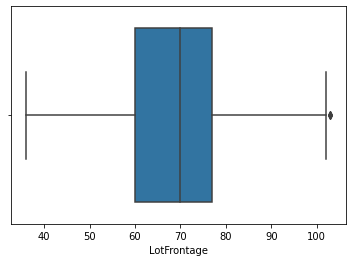

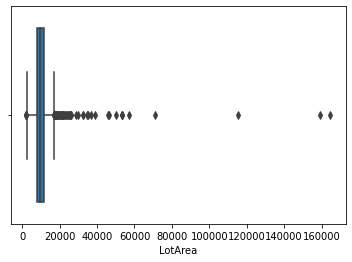

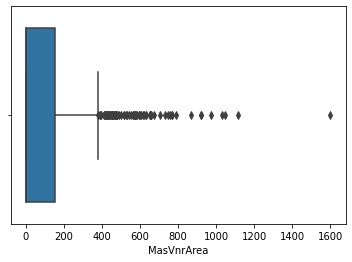

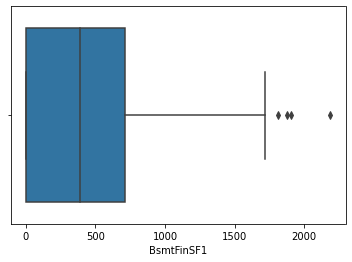

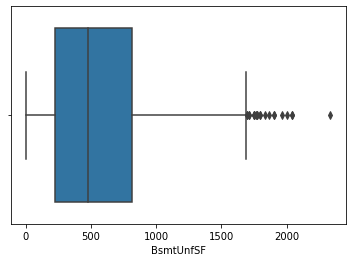

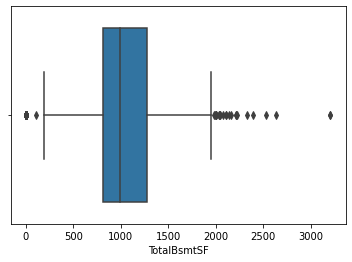

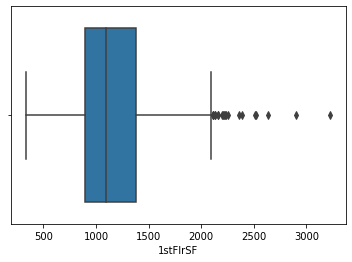

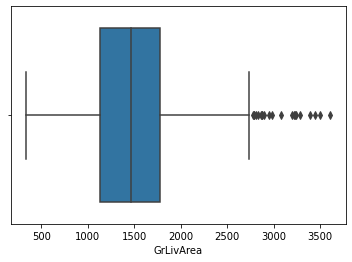

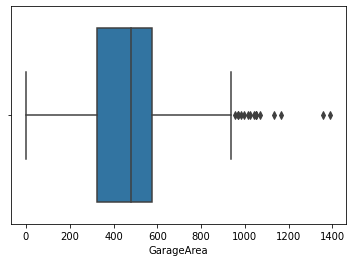

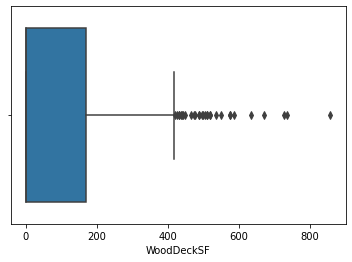

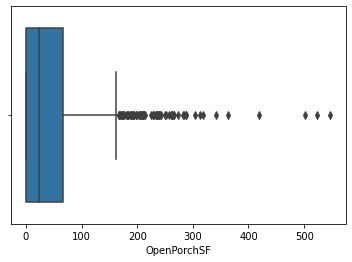

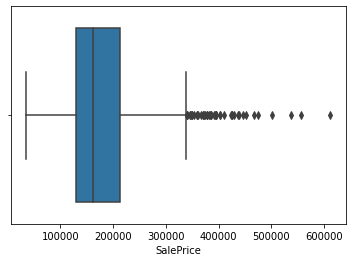

In [115]:
# check whether we have dropped outliers for others also by dropping it for 1 column
for i,col in enumerate(k):
    plt.figure(i)
    sns.boxplot(data=new_df,x=col)

# Important Note
## After dropping the outliers for LotFrontage column , we have dropped around 400 rows. And still some columns are left to handle outliers. We already have less data so we will continue doing Univariate analysis on numeric columns but for building model we will take the 1460 rows with outliers

LotFrontage
(1174, 46)
LotArea
(1199, 46)
MasVnrArea
(516, 46)
BsmtFinSF1
(929, 46)
BsmtUnfSF
(1189, 46)
TotalBsmtSF
(1259, 46)
1stFlrSF
(1198, 46)
GrLivArea
(1290, 46)
GarageArea
(1277, 46)
WoodDeckSF
(628, 46)
OpenPorchSF
(719, 46)
SalePrice
(1245, 46)


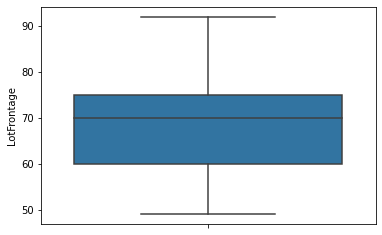

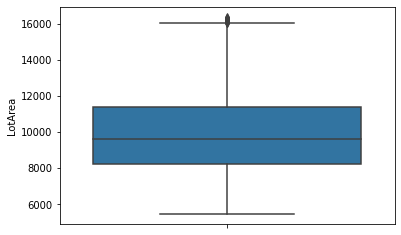

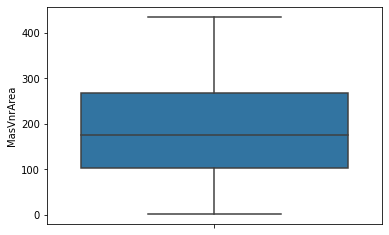

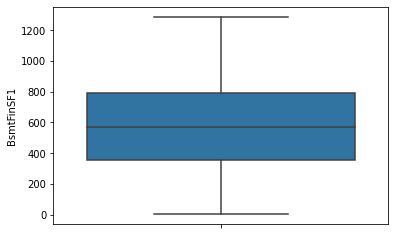

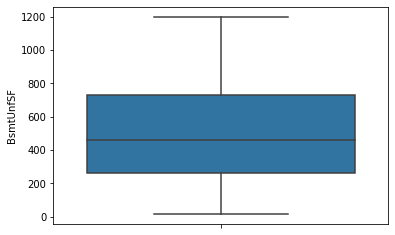

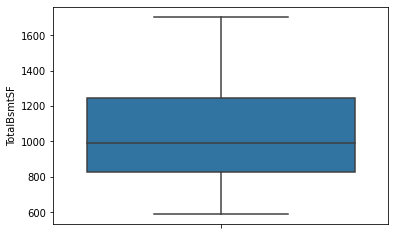

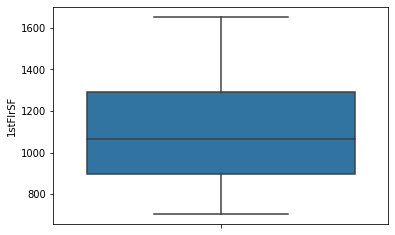

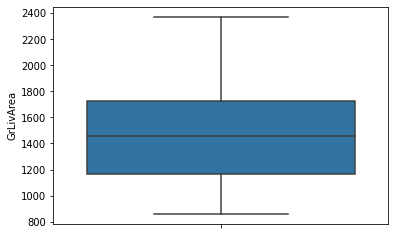

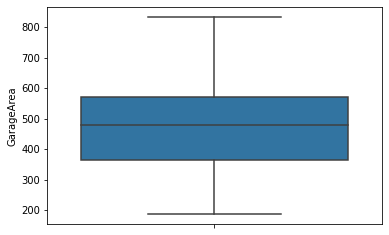

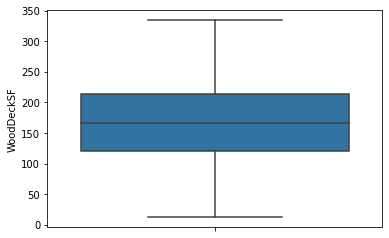

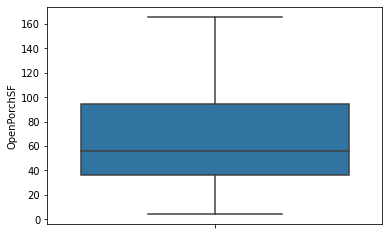

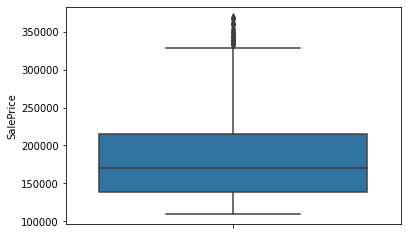

In [116]:
#lets iterate the steps of dropping outliers for all columns
for i,col in enumerate(k):
    print(col)
    l=np.percentile(new_df[col],[5,95])
    new_df=houses_df[(houses_df[col]>l[0]) & (houses_df[col]<l[1])]
    print(new_df.shape)
    plt.figure(i)
    sns.boxplot(data=new_df,y=col)

### 1) We observe that after removing outliers from 5 percentile  above and less than 95 percentile, Sale Price Still have outliers.
### 2) The row count is decreased to 508 after removing outliers for MasVnrArea column.
### 3) So lets continue with original dataset. We will not drop any outlier because it is causing drop of many rows.

## Univariate Analysis on Categorical Columns

In [117]:
#creating list of categorical columns
catcols=[ i for i in houses_df.columns if i not in houses_df.describe().columns ]
len(catcols)

24

C:\Users\Rebel\AppData\Local\Temp\ipykernel_18660\3695283170.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


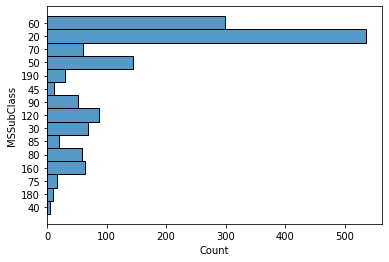

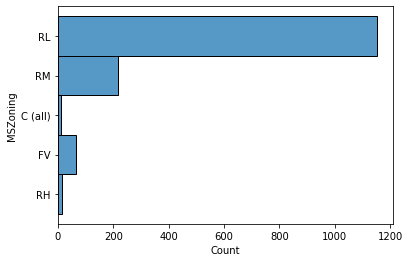

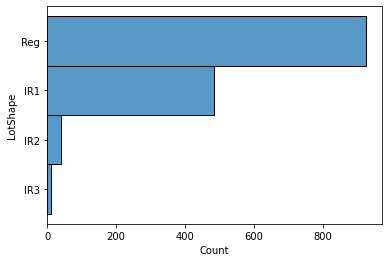

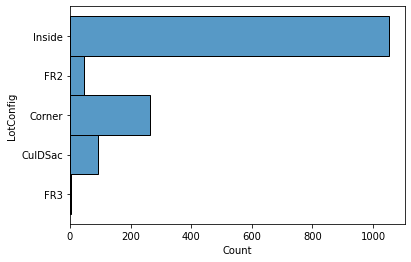

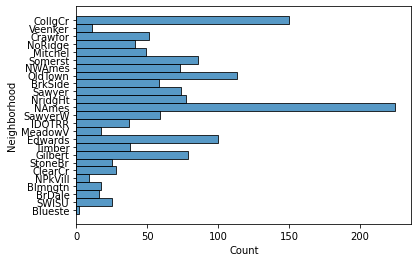

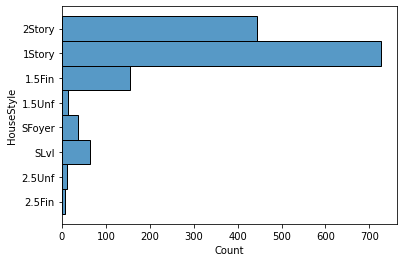

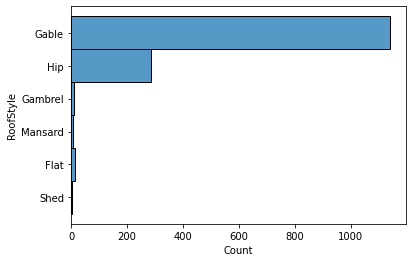

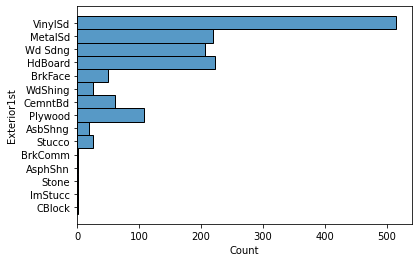

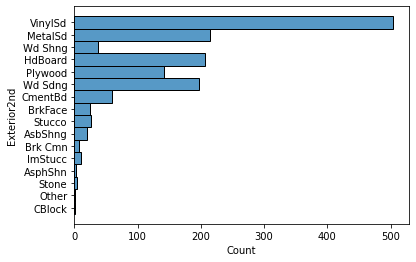

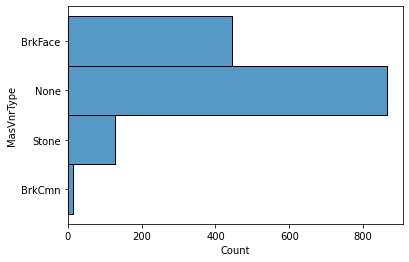

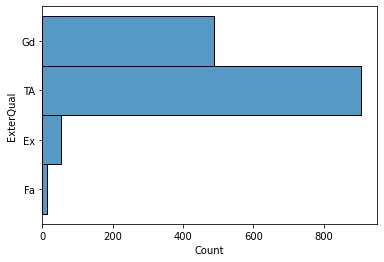

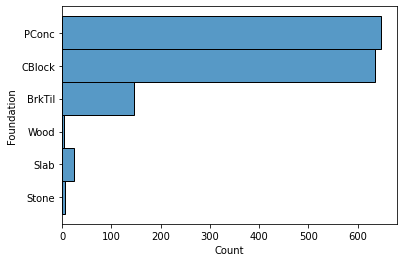

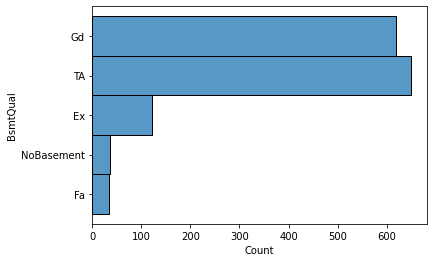

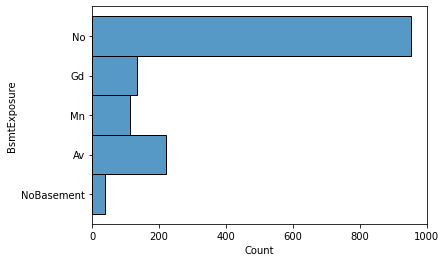

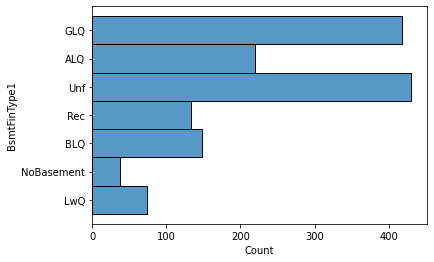

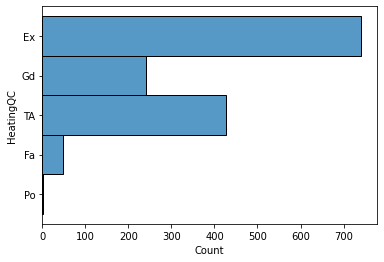

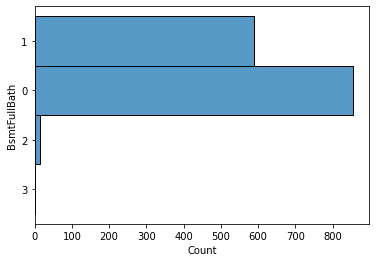

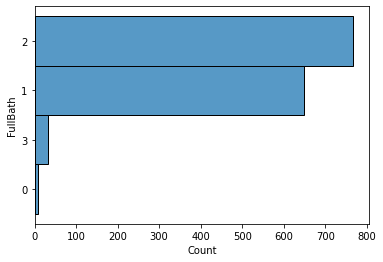

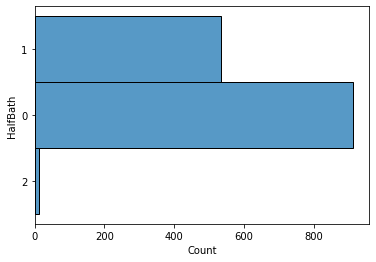

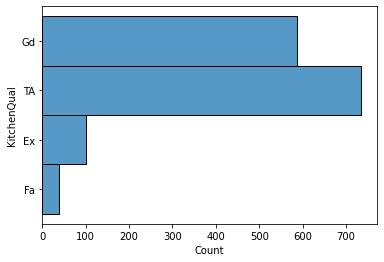

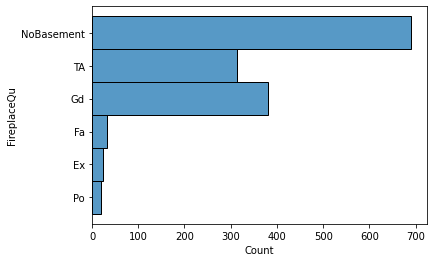

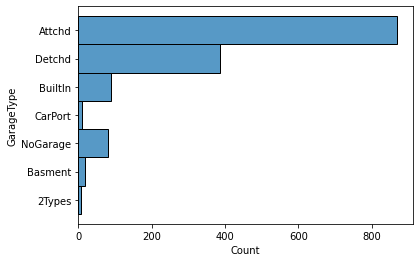

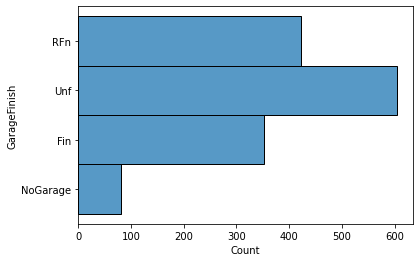

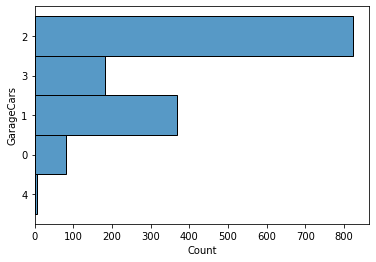

In [118]:
#ploting histplot on all categorical columns
for i in catcols:
    plt.figure(i)
    sns.histplot(data=houses_df,y=i)

### 1) MSSubclass 20 has most records in data and 40 has lowest.
### 2) For MSZoning, we have more data around RL (Resident Low density) and minimum data for C (commercialized) one.
### 3) Most of the property has LotShape regular and lot configuration is inside.
### 4) Most of the properties are in North Ames neighborhood.
### 5) Maximum property are one story ready and properties with 2 and half story are very less.
### 6) Gaple Roofstyle is 78% of total property. and Shed is only  0.1% of total property.
### 7) Vinyl Siding is most preferred in Exterior 1 covering house and exterior 2 covering house.
### 8) The foundation of properties are mostly made of poured concrete or cinder block.
### 9) External quality, Basement Quality, Kitchen Quality and Fire Place quality is either good or average for the properties having it. 
### 10) Rating for basement finished area is well distributed and it will be good for ML model.
### 11) Heating condition is good for most of properties
### 12) Attached garage type is preferred
### 13) Most properties have average exterior quality, opted out from  Masonary Veener type, dont have exposure to make out of basement and unfinished garage interior.
### 14) Mostly propertied have garages which can hold 2 cars.
### 15) Most of the properties dont have basement full bathroom and half bathroom above grade. Full bathrooms above grade are 1 or 2 in most of properties.

## Bivariate Analysis

### Numeric Columns vs SalePrice

C:\Users\Rebel\AppData\Local\Temp\ipykernel_18660\1389140313.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(j)


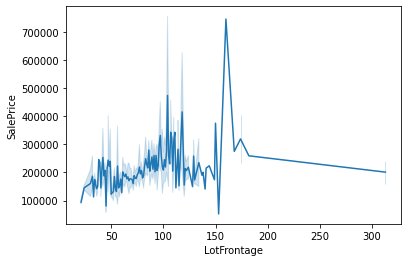

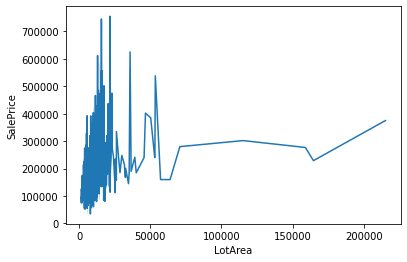

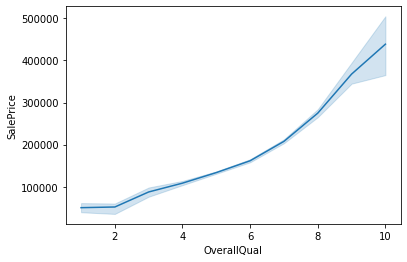

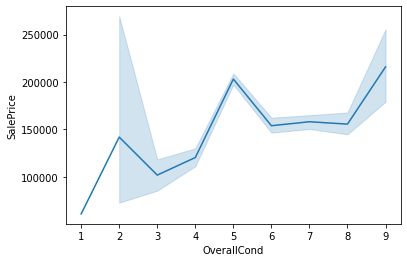

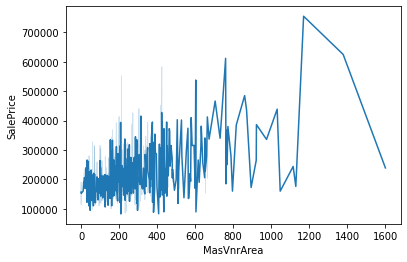

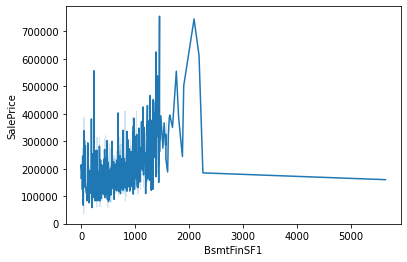

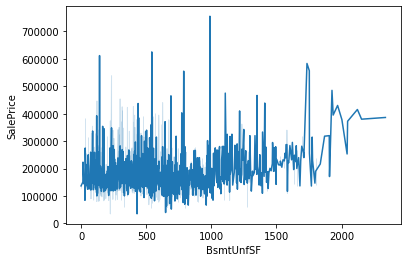

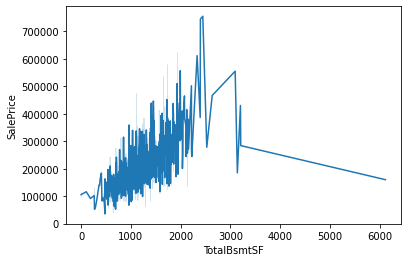

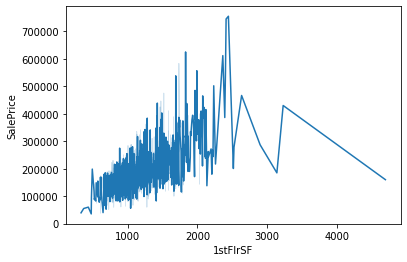

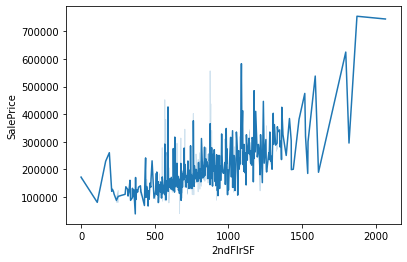

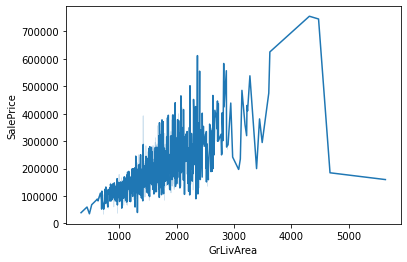

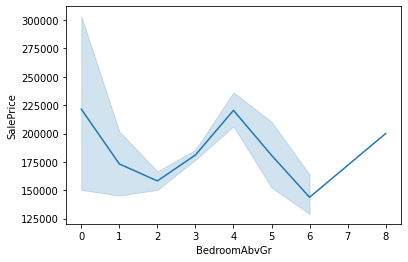

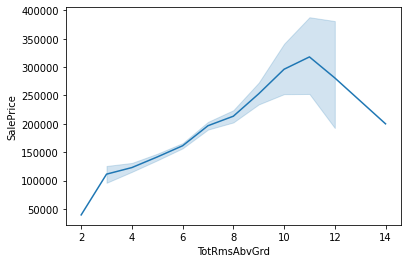

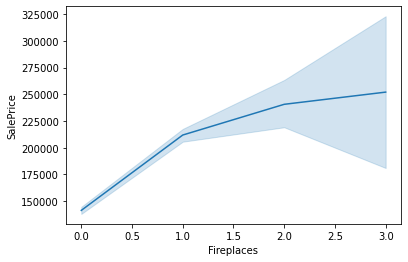

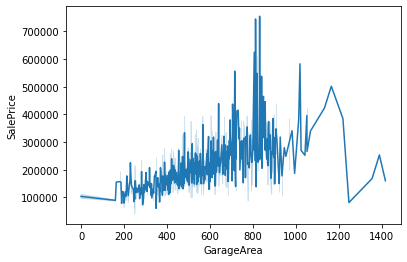

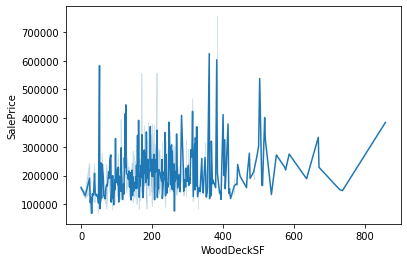

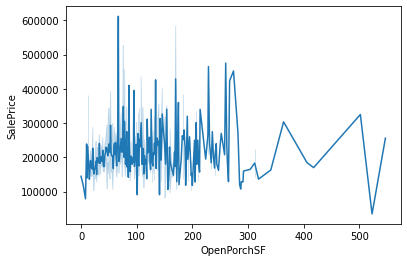

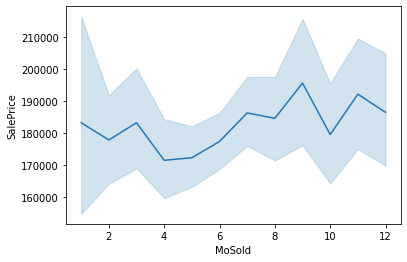

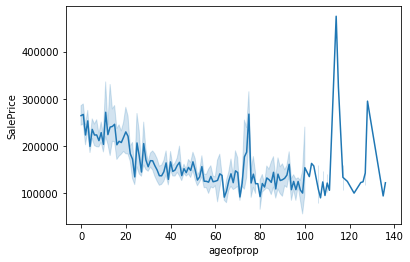

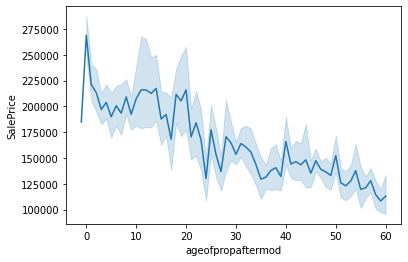

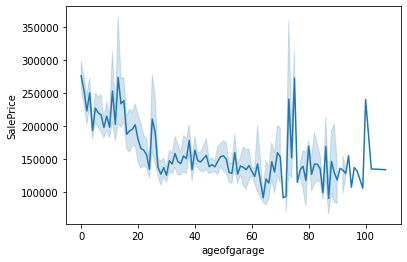

In [119]:
# line plot between saleprice vs other numeric columns
j=0
for i in houses_df.describe().columns:
    if i!='SalePrice':
        j=j+1
        plt.figure(j)
        sns.lineplot(x=houses_df[i],y=houses_df['SalePrice'])

#### From the above graphs we can observer that 1stFlrSF ,2ndFlrSF, GrLivArea,Garage Area, WoodDeckSF are having linear relation with SalePrice.

### Categorical Columns vs SalePrice

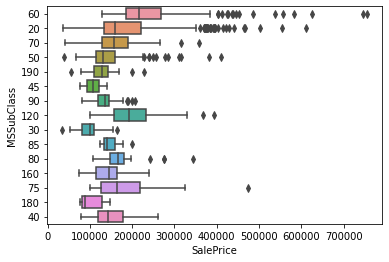

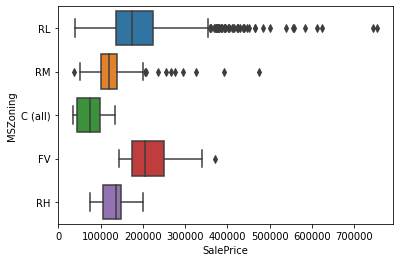

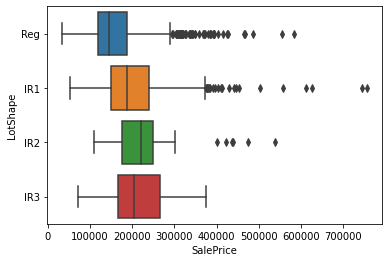

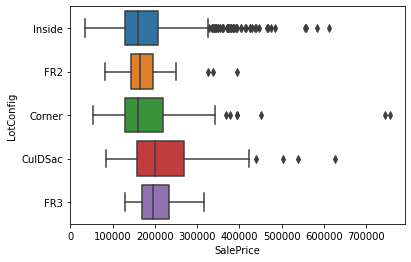

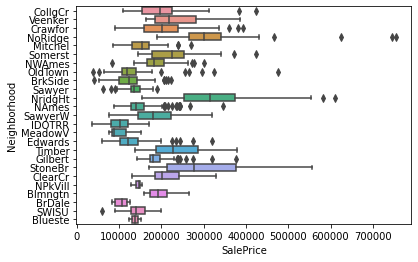

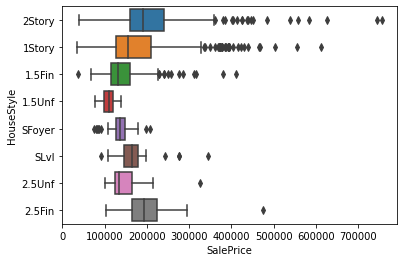

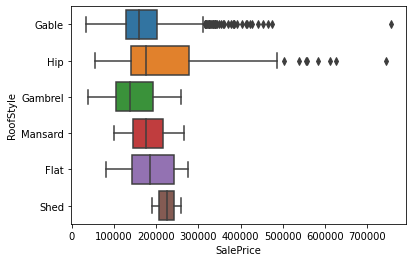

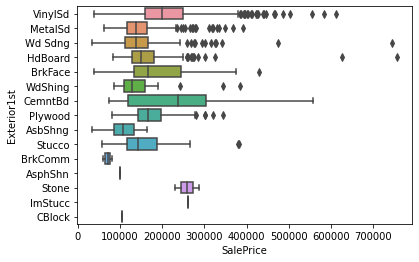

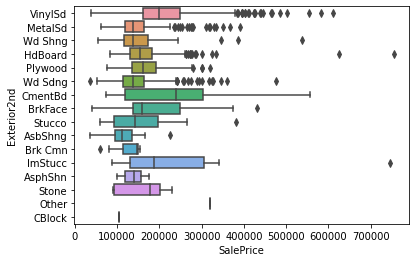

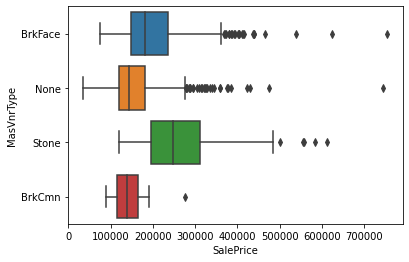

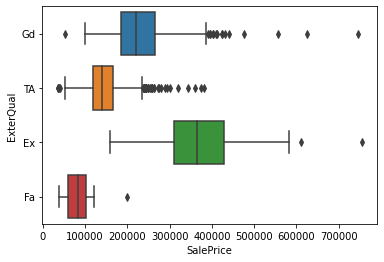

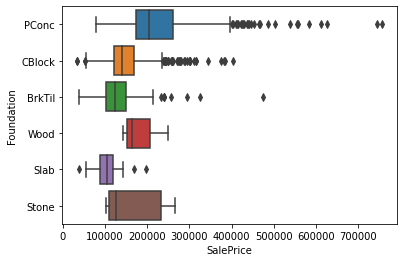

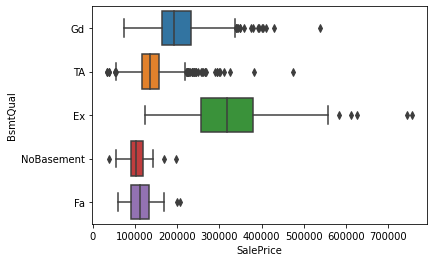

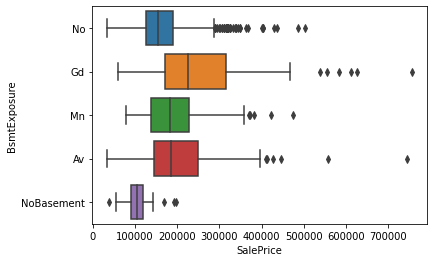

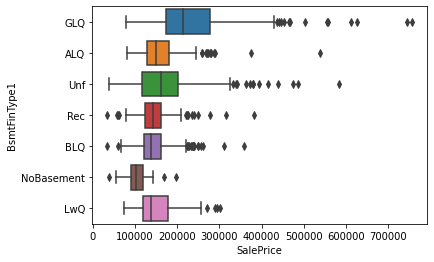

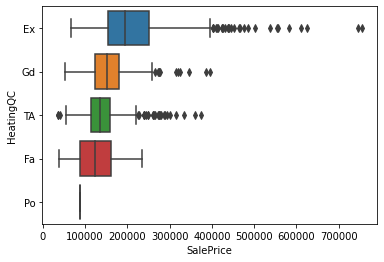

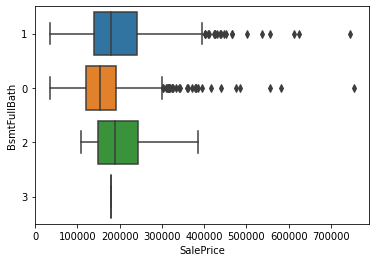

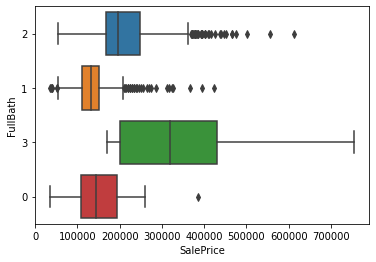

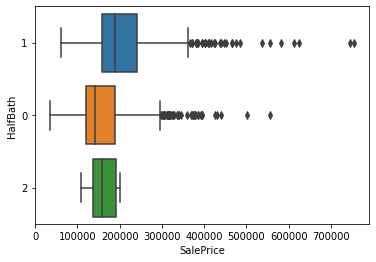

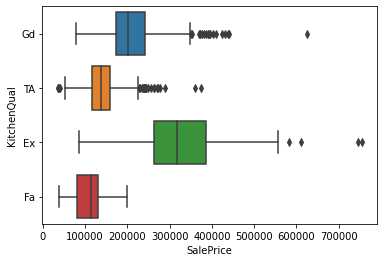

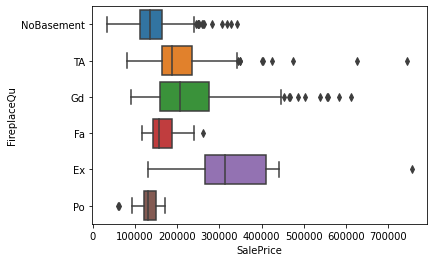

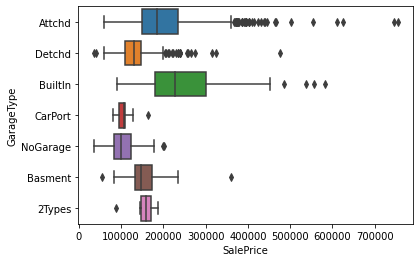

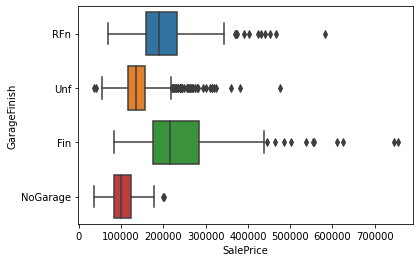

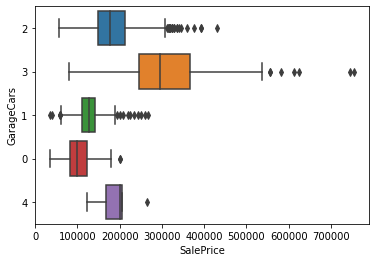

In [120]:
# box plot between saleprice vs other categorical columns
j=0
for i in catcols:
    j=j+1
    plt.figure(j)
    sns.boxplot(y=i,x='SalePrice',data=houses_df)
    plt.show()

#### 1) With increasing Basement exposure and increasing rating in the heating quality, Kitchen Quality, Fireplace Quality , external quality rating and basement quality, the SalePrice increases.
#### 2) The low density residential area has higher prices than high density or commercial area.
#### 3) Mean SalePrice increases from regular lot shape to moderately irregular but decreases at completely irregular.
#### 4) Stone Br neighborhood has highest saleprice. NridgHT neighborhood comes second.
#### 5) 2 story houses are costlier than 2.5 story
#### 6) RoofStyle Hip has more sales price than Gaple.
#### 7) Properties with cement build on Exterior 1 and exterior 2 are costlier
#### 8) Finished Garage and Garage nearby home have higher sale price.
#### 9) in case of full bathroom above grade are 3 then it is costlier property

## Multi Variate Analysis

<AxesSubplot:>

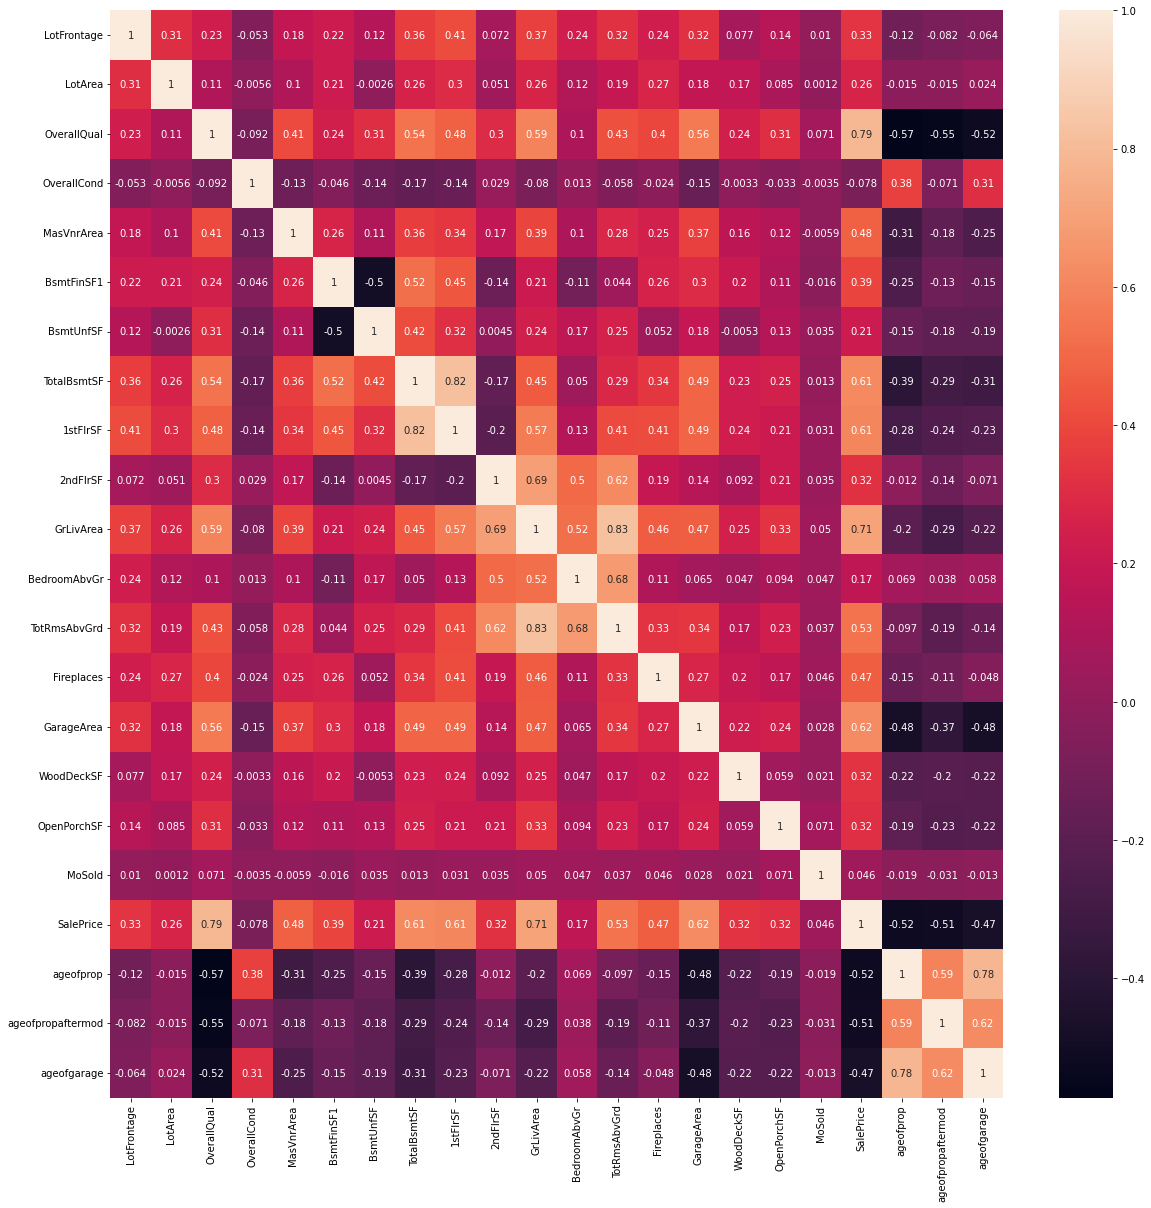

In [121]:
# to see the correlation among columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(houses_df.corr(),annot=True,ax=ax)

### We can see here a lot columns are highly correlated with SalePrice column. Top 3 are OverallQual, GrLiveArea and GarageArea

# Finishing EDA

# Preparing data for the model

In [122]:
#creating list for numerical columns
num_cols=houses_df.describe().columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'ageofprop',
       'ageofpropaftermod', 'ageofgarage'],
      dtype='object')

### Creating dummy variables for categorical values.

In [123]:
#in a loop reading all categorical columns and creating the dummy variables
for i in set(houses_df.columns).difference(set(houses_df.describe().columns)):
    dummy_df=pd.get_dummies(houses_df[i],drop_first=True,prefix=i)
    houses_df=pd.concat([houses_df,dummy_df],axis=1)
    houses_df=houses_df.drop(i,axis=1)

In [124]:
# columns in new dataframe
houses_df.shape

(1460, 170)

### Splitting into train and test

In [125]:
# splitting data in 70 training:30 testing ratio with random_state=100
houses_train,houses_test=train_test_split(houses_df,train_size=0.7,random_state=100)

### Scaling the numerical features for both train

In [126]:
#scaling all numerical variables
scaler=MinMaxScaler()
houses_train[num_cols]=scaler.fit_transform(houses_train[num_cols])
houses_test[num_cols]=scaler.transform(houses_test[num_cols])

### Creating X_train, y_train and X_test, y_test

In [127]:
# spliting the indepedent variables and dependent variable
y_train=houses_train.pop('SalePrice')
X_train=houses_train

y_test=houses_test.pop('SalePrice')
X_test=houses_test

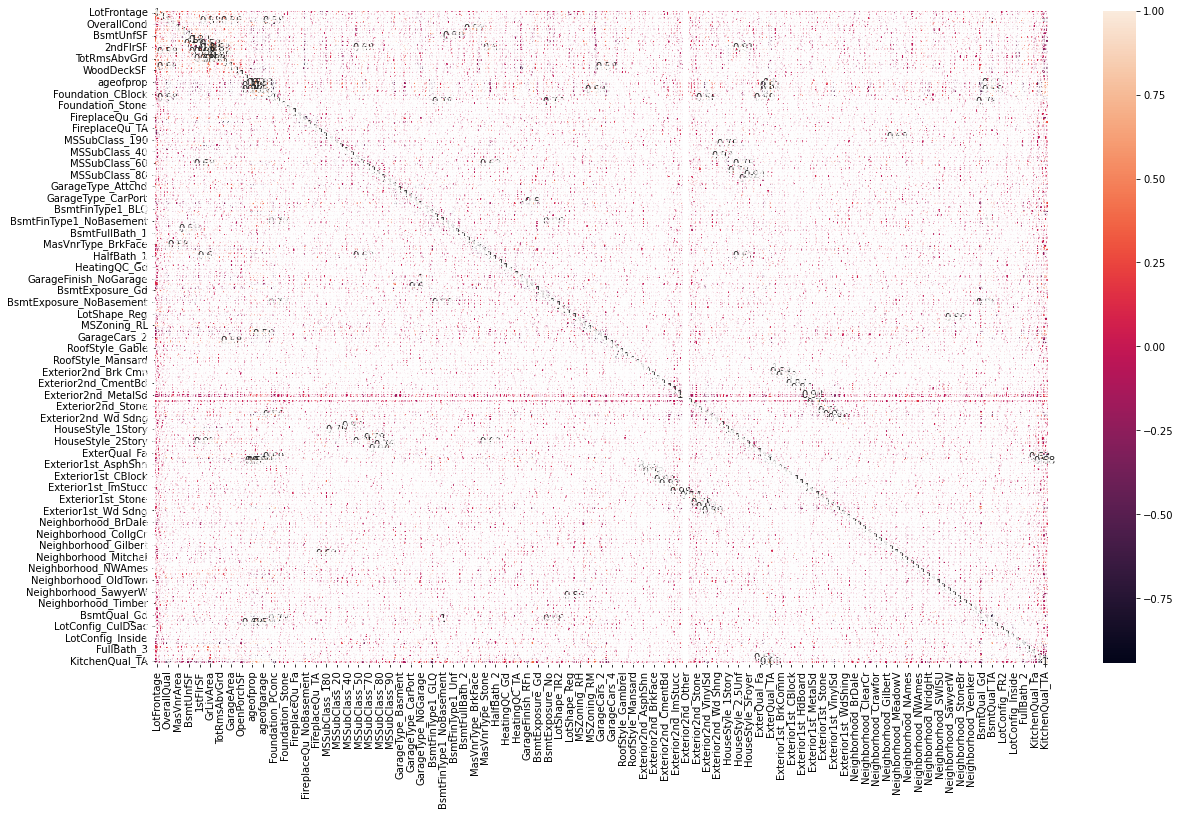

In [128]:
#heatmap to see correlation
plt.figure(figsize=[20,12])
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### There are so many columns due to which visualization is not clear.

## Training the model

### Using the Variable selection method via RFE

In [129]:
lm=LinearRegression()
#starting with selecting 50 variables
rfe=RFE(lm,n_features_to_select=50)
rfe=rfe.fit(X_train,y_train)

In [130]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 31),
 ('BsmtFinSF1', False, 83),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', False, 68),
 ('1stFlrSF', False, 88),
 ('2ndFlrSF', False, 33),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 119),
 ('TotRmsAbvGrd', False, 30),
 ('Fireplaces', False, 29),
 ('GarageArea', False, 6),
 ('WoodDeckSF', False, 44),
 ('OpenPorchSF', False, 63),
 ('MoSold', False, 118),
 ('ageofprop', True, 1),
 ('ageofpropaftermod', False, 94),
 ('ageofgarage', False, 38),
 ('Foundation_CBlock', False, 42),
 ('Foundation_PConc', False, 41),
 ('Foundation_Slab', False, 114),
 ('Foundation_Stone', False, 39),
 ('Foundation_Wood', False, 27),
 ('FireplaceQu_Fa', False, 16),
 ('FireplaceQu_Gd', False, 14),
 ('FireplaceQu_NoBasement', False, 13),
 ('FireplaceQu_Po', False, 12),
 ('FireplaceQu_TA', False, 15),
 ('MSSubClass_160', False, 91),
 ('MSSubClass_180', False, 106),
 ('MSSubClass_190

In [131]:
#dropping columns with support_ flag as False and selecting the True ones
col=X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       ...
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'FullBath_1', 'FullBath_2'],
      dtype='object', length=119)

In [132]:
#predicting values on training data
y_train_pred=rfe.predict(X_train)
print(r2_score(y_train, y_train_pred))

0.8679097739641165


In [133]:
# predict sale prices of test data
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

-2.7022630199534348e+16


In [134]:
# trying with RFE with 40 features
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=40)             
rfe = rfe.fit(X_train, y_train)
y_train_pred=rfe.predict(X_train)
print(r2_score(y_train, y_train_pred))

# predict sale prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.860712261120577
0.8535454692867585


In [135]:
# trying with RFE with 100 features
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=100)             
rfe = rfe.fit(X_train, y_train)
y_train_pred=rfe.predict(X_train)
print(r2_score(y_train, y_train_pred))

# predict sale prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8884063547210147
-3.6647262340049843e+18


In [136]:
# trying with RFE with 30 features
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=30)             
rfe = rfe.fit(X_train, y_train)
y_train_pred=rfe.predict(X_train)
print(r2_score(y_train, y_train_pred))

# predict sale prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.8568735467271887
0.8509732725359633


### Lets pick a baseline model out of above ones. We observed above that ,taking 30 features is giving good r2 score on train and test data.

In [137]:
#Picking baseline model with RFE with 30 features
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=30)             
rfe = rfe.fit(X_train, y_train)
y_train_pred=rfe.predict(X_train)
print(r2_score(y_train, y_train_pred))
# predict sale prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8568735467271887
0.8509732725359633


In [138]:
#calculating all metrices for rfe model
# r-squared (r2) on training data
metric_rfe = []
r2_train_rfe = r2_score(y_train, y_train_pred)
print(r2_train_rfe)
metric_rfe.append(r2_train_rfe)

# r2 on testing data
r2_test_rfe = r2_score(y_test, y_pred)
print(r2_test_rfe)
metric_rfe.append(r2_test_rfe)

# residual squared sum (rss) on training data
rss1_rfe = np.sum(np.square(y_train - y_train_pred))
print(rss1_rfe)
metric_rfe.append(rss1_rfe)

#rss on testing data
rss2_rfe = np.sum(np.square(y_test - y_pred))
print(rss2_rfe)
metric_rfe.append(rss2_rfe)

#root mean squared error on train data
mse_train_rfe = mean_squared_error(y_train, y_train_pred)
print(mse_train_rfe)
metric_rfe.append(mse_train_rfe**0.5)

#rmse on test data
mse_test_rfe = mean_squared_error(y_test, y_pred)
print(mse_test_rfe)
metric_rfe.append(mse_test_rfe**0.5)

0.8568735467271887
0.8509732725359633
1.761494625311438
0.8120980326347763
0.0017252640796390187
0.0018498816233138413


### Above model is on Linear Regression RFE with 30 features. Lets see if we have all features in Linear Regression then what are the model metrics

In [139]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# r-squared (r2) on training data
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

# r2 on testing data
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

#rss on training data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

#rss on testing data
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

#root mean squared error on train data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

#root mean squared error on test data
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8902501332991611
-2.9888612301668917e+19
1.3507202610106095
1.6287335608457465e+20
0.0013229385514305675
3.710099227439058e+17


In [140]:
# looking into beta coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-617487378521.1932
[-7.43016180e-02  1.57197445e-01  1.06896582e-01  4.20103620e-02
  1.52357185e-02  1.84244364e-02  2.44855500e-02 -4.19206203e-02
 -2.66816630e-02  4.12233705e-02  3.12405712e-01 -1.43045988e-02
  2.27739814e-02  1.17776107e-02 -1.92803232e-02  1.61179747e-02
 -6.88799052e-03 -2.60927181e-03 -2.36141109e-02 -6.72602442e-03
 -8.02443218e-03  1.05985111e-02  5.64232092e-03 -1.34896245e-02
  3.37603365e-02  3.76194633e-02 -2.05513302e-02 -1.79265469e-02
 -2.04854072e-02 -2.40074221e-02 -1.51023367e-02 -4.52769376e-03
 -7.09275125e-04  1.68902810e-02  3.09245412e-02  1.75158733e-02
  1.89638034e-02  2.03167343e-02  2.96952958e-02  3.13982869e-02
  3.15855967e-02  4.18147648e-02  3.27017519e-02  2.73001264e-02
  1.24916688e-02  3.77414687e-02  2.91033815e-02  2.22997988e-02
  2.08412086e-02  3.68503644e-02  5.26611175e+11 -4.11012687e-03
  2.45415079e-04 -1.62103635e-02 -1.35471336e+11 -8.29481253e-03
 -1.94562096e-02  1.01055118e-02  3.16222090e-03 -1.92915044e-03
  7.46

### We observe that the test R2 is negative. Lets see How Ridge and Lasso help us removing the features

## Ridge Regression

In [141]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initializing in Ridge
ridge = Ridge()

# cross validation to create model and get the value of alpha from best_params_
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [142]:
#getting the optimized alpha value
print(model_cv.best_params_)

{'alpha': 8.0}


In [143]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.06450827e-03  2.60258161e-02  7.75029705e-02  3.07019556e-02
  2.53225090e-02  1.59727989e-02  1.75731583e-02  2.46206265e-02
  4.37616785e-02  4.87193003e-02  5.45484969e-02  1.07680290e-02
  3.55246102e-02  2.46332683e-02  1.79279277e-02  1.51401700e-02
  1.12716183e-03 -8.71748022e-05 -8.99627759e-03 -1.65863259e-02
 -2.19084159e-03  5.17457049e-03  6.72030776e-03 -3.07780565e-03
  6.62055034e-03  5.90078277e-03 -1.18854413e-02 -8.69478612e-03
 -1.38826637e-02 -1.46997444e-02 -8.04567055e-03 -1.58590008e-02
 -5.97528164e-03 -6.01615781e-03  2.05299415e-02  3.18409232e-03
  3.06474988e-03  5.17745703e-03  1.05430791e-02  8.84743682e-03
  9.34806274e-03  5.36273045e-03  9.67500999e-04  1.87896823e-03
 -2.50359992e-03  1.12914950e-02  5.12964788e-03  2.52727001e-03
 -6.61833697e-03  6.75693287e-03 -1.08422736e-02  1.21184048e-03
  9.06363930e-03 -2.51522534e-03 -1.48465855e-02 -3.06364978e-03
 -1.10009775e-02  1.05127358e-02  9.82562092e-03  9.73489050e-05
  2.28006460e-03  3.69337

In [144]:
# Lets calculate some metrics such as R2 score, RSS and MSE on training and test data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge= np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

0.8785995636959946
0.8629569536014359
1.4941068626381735
0.746794821710136
0.001463375967324362
0.0017011271565151162


### Ridge makes the r2 score +ve on test data

In [145]:
#checking how many coefficients have been made 0 i.e. how many features were dropped
k=[]
for i in ridge.coef_:
    if i==0:
        k.append(0)
len(k)

1

### Ridge has made hpyerparamter 0 for only 1 independent variable. Meaning 168 Variables are part of ML model

## Lasso Regression

In [146]:
#initializing Lasso
lasso = Lasso()

# cross validation to create model and get the value of alpha from best_params_
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [147]:
#getting the optimized alpha value
print(model_lasso.best_params_)

{'alpha': 0.0001}


In [148]:
#Fitting Lasso model for alpha = .0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-5.34545089e-03  9.02382012e-02  1.33196137e-01  3.82833208e-02
  1.65090439e-02  0.00000000e+00  3.57697644e-03  0.00000000e+00
  0.00000000e+00  1.68854512e-02  2.44999960e-01  0.00000000e+00
  8.42275374e-03  1.77315688e-02  0.00000000e+00  1.18026246e-02
 -1.54891714e-03 -0.00000000e+00 -1.44640732e-02 -1.11820351e-02
 -0.00000000e+00  5.31669634e-03  5.59332081e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.24165727e-03
 -3.26034363e-03 -3.91980673e-03  0.00000000e+00 -2.03608834e-02
 -0.00000000e+00 -4.61093889e-03  1.97921771e-02  5.20839146e-03
  0.00000000e+00  0.00000000e+00  7.07528895e-03  3.72794694e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.07325301e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  9.09502852e-03 -6.56450571e-03  8.82545900e-05
  4.92172946e-03 -4.55397656e-03 -3.71307020e-02 -3.90030653e-03
 -1.07919899e-02  9.88311780e-03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.00147

In [149]:
#checking how many coefficients have been made 0 i.e. how many features were dropped 
k=[]
for i in lasso.coef_:
    if i==0:
        k.append(i)
print(len(k))
print(X_train.shape)

75
(1021, 169)


### Lasso has made hpyerparamter 0 for 75 independent variables. Meaning 94 variables are part of ML model.

In [150]:
# Lets calculate some metrics such as R2 score, RSS and MSE on training and test data

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

0.885235628009283
0.8669671596625304
1.4124350867100883
0.7249418258878879
0.0013833840222429855
0.001651348122751453


In [151]:
# Creating a dataframe which contain all the metrics for all models we have seen so far

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rfe_metric = pd.Series(metric_rfe, name = 'Linear Regression with RFE')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rfe_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Linear Regression with RFE,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.902501e-01,0.856874,0.878600,0.885236
1,R2 Score (Test),-2.988861e+19,0.850973,0.862957,0.866967
2,RSS (Train),1.350720e+00,1.761495,1.494107,1.412435
3,RSS (Test),1.628734e+20,0.812098,0.746795,0.724942
4,MSE (Train),3.637222e-02,0.041536,0.038254,0.037194
5,MSE (Test),6.091058e+08,0.043010,0.041245,0.040637


# Subjective Questions Code

### Doubling the alpha for Ridge and Lasso

In [152]:
#doubling the alpha.
alpha = 16
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=16)

In [153]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric_r = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric_r.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric_r.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metric_r.append(rss1_ridge)

rss2_ridge= np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metric_r.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric_r.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric_r.append(mse_test_ridge**0.5)

0.8668442328297805
0.8544593641096965
1.6387827884792512
0.7931011174049459
0.0016050761885203243
0.0018066084678928153


In [154]:
alpha = 0.0002
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [155]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric_l = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric_l.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric_l.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metric_l.append(rss1_lasso)

rss2_lasso= np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metric_l.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric_l.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric_l.append(mse_test_lasso**0.5)

0.87706197188852
0.8620214646978859
1.5130304064196065
0.7518926233666074
0.001481910290322827
0.001712739460971771


In [156]:
rg1_metric = pd.Series(metric_r, name = 'Ridge Regression (Double)')
ls1_metric = pd.Series(metric_l, name = 'Lasso Regression (Double)')

In [157]:
final_metric = pd.concat([final_metric,rg1_metric,ls1_metric],axis=1)
final_metric

,Metric,Linear Regression,Linear Regression with RFE,Ridge Regression,Lasso Regression,Ridge Regression (Double),Lasso Regression (Double)
0,R2 Score (Train),8.902501e-01,0.856874,0.878600,0.885236,0.866844,0.877062
1,R2 Score (Test),-2.988861e+19,0.850973,0.862957,0.866967,0.854459,0.862021
2,RSS (Train),1.350720e+00,1.761495,1.494107,1.412435,1.638783,1.513030
3,RSS (Test),1.628734e+20,0.812098,0.746795,0.724942,0.793101,0.751893
4,MSE (Train),3.637222e-02,0.041536,0.038254,0.037194,0.040063,0.038496
5,MSE (Test),6.091058e+08,0.043010,0.041245,0.040637,0.042504,0.041385


## Lets observe the changes in the coefficients(hyperparameters) after regularization for all models

In [158]:
#creating a dataframe of betas for all model coefficients
betas = pd.DataFrame(index=X_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Ridge2'] = ridge2.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(170)

,Linear,Ridge,Ridge2,Lasso,Lasso2
LotFrontage,-7.430162e-02,-0.002065,0.003273,-0.005345,-0.000000
LotArea,1.571974e-01,0.026026,0.016361,0.090238,0.030026
OverallQual,1.068966e-01,0.077503,0.060640,0.133196,0.141970
OverallCond,4.201036e-02,0.030702,0.023772,0.038283,0.029444
MasVnrArea,1.523572e-02,0.025323,0.022048,0.016509,0.010140
BsmtFinSF1,1.842444e-02,0.015973,0.014120,0.000000,0.000000
BsmtUnfSF,2.448555e-02,0.017573,0.017267,0.003577,0.000000
TotalBsmtSF,-4.192062e-02,0.024621,0.021546,0.000000,0.000000
1stFlrSF,-2.668166e-02,0.043762,0.034343,0.000000,0.000000
2ndFlrSF,4.122337e-02,0.048719,0.037388,0.016885,0.000000


In [159]:
# top5 attributes for Lasso2
betas['Lasso2'].sort_values(ascending=False).head(10)

GrLivArea               0.245696
OverallQual             0.141970
FullBath_3              0.068225
Neighborhood_NoRidge    0.067470
Neighborhood_NridgHt    0.039777
GarageCars_3            0.038662
Neighborhood_Crawfor    0.030286
LotArea                 0.030026
OverallCond             0.029444
BsmtExposure_Gd         0.029270
Name: Lasso2, dtype: float64

In [160]:
# top5 attributes for ridge2
betas['Ridge2'].sort_values(ascending=False).head(10)

OverallQual             0.060640
Neighborhood_NoRidge    0.047653
FullBath_3              0.046748
GrLivArea               0.042792
2ndFlrSF                0.037388
1stFlrSF                0.034343
TotRmsAbvGrd            0.032730
GarageCars_3            0.030433
Neighborhood_NridgHt    0.028103
BsmtExposure_Gd         0.027923
Name: Ridge2, dtype: float64

In [161]:
# top5 attributes for Lasso
betas['Lasso'].sort_values(ascending=False).head()

GrLivArea               0.245000
OverallQual             0.133196
LotArea                 0.090238
Neighborhood_NoRidge    0.069533
FullBath_3              0.066144
Name: Lasso, dtype: float64

In [162]:
betas['Ridge'].sort_values(ascending=False).head()

OverallQual             0.077503
Neighborhood_NoRidge    0.056941
GrLivArea               0.054548
FullBath_3              0.052774
2ndFlrSF                0.048719
Name: Ridge, dtype: float64

In [163]:
Ridge_top5=['OverallQual','GrLivArea','FullBath_3','2ndFlrSF','Neighborhood_NoRidge']

In [164]:
Lasso_top5=['FullBath_3', 'Neighborhood_NoRidge','LotArea' ,'OverallQual' ,'GrLivArea']             

In [165]:
#dropping top5 attributes from ridge
X_train_ridge=X_train.drop(Ridge_top5,axis=1)
X_test_ridge=X_test.drop(Ridge_top5,axis=1)

In [166]:
ridge5 = Ridge()
# cross validation to create model and get the value of alpha from best_params_
folds = 5
model_ridge = GridSearchCV(estimator = ridge5, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train_ridge, y_train) 
print(model_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 7.0}


In [167]:
#creating ridge model with aplha=7
alpha5 = 7
ridge5 = Ridge(alpha=alpha5)

ridge5.fit(X_train_ridge, y_train)

Ridge(alpha=7)

In [168]:
# new top 10 features in ridge model
betas_ridge = pd.DataFrame(index=X_train_ridge.columns)
betas_ridge['ridge5']=ridge5.coef_
betas_ridge['ridge5'].sort_values(ascending=False).head(10)

1stFlrSF               0.065718
TotRmsAbvGrd           0.059138
MasVnrArea             0.044891
OverallCond            0.038105
TotalBsmtSF            0.035700
LotArea                0.032288
GarageCars_3           0.032043
Fireplaces             0.030659
BsmtExposure_Gd        0.029930
Exterior1st_BrkFace    0.029256
Name: ridge5, dtype: float64

In [169]:
#dropping top5 attributes from lasso
X_train_lasso=X_train.drop(Lasso_top5,axis=1)
X_test_lasso=X_test.drop(Lasso_top5,axis=1)

In [170]:
#initializing Lasso
lasso5 = Lasso()

# cross validation to create model and get the value of alpha from best_params_
model_lasso = GridSearchCV(estimator = lasso5, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train_lasso, y_train) 
print(model_lasso.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [171]:
#creating lasso model with aplha=0.0001
alpha_lasso5 = 0.0001
lasso5 = Lasso(alpha=alpha_lasso5)

lasso5.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [172]:
# new top 10 features in lasso model
betas_lasso = pd.DataFrame(index=X_train_lasso.columns)
betas_lasso['lasso5']=lasso5.coef_
betas_lasso['lasso5'].sort_values(ascending=False).head(10)

1stFlrSF                0.295206
2ndFlrSF                0.185440
OverallCond             0.053404
MasVnrArea              0.044187
GarageCars_3            0.043991
Exterior1st_BrkFace     0.034615
Neighborhood_NridgHt    0.033175
BsmtExposure_Gd         0.029448
Neighborhood_StoneBr    0.027579
GarageCars_4            0.027023
Name: lasso5, dtype: float64

## Notebook Ends Here